Benjamin Katz week 5

Thank you to the following recourses that guided me in this project

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros
https://www.tensorflow.org/guide/keras/train_and_evaluate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
import matplotlib.pyplot as plt

Here we seprate out the training and testing data. It is important to keep them seperate to ensure that our model is actually a good general model and not overfit to the testing data

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
#Load the model from keras
mnist = keras.datasets.mnist.load_data()
#It comes loaded seperated into testing and training(the first dinmension)
#The data also is seperated into X and y(pixel values and golden labels)(the second dimension) 
#The X data is a 28x28 array that represents the image
X_training = mnist[0][0] 
y_training = mnist[0][1]
X_testing = mnist[1][0]
y_testing = mnist[1][1]


Here we hot encode the y values to ensure that we don't fall into the trap of proximity meaning similarity. A 4 does not look like a five and there should be no insentive to guess 'close' to the correct answer when there is nothing that makes 4 and 5 close at all. 

In [ ]:
#Convert the y data from 0-9 to an array where the Ith index of the array is a 1 to indicate the diget
#this is neccessary because it is illogical to say that if we predict 3 but it was really 4 then we are 'close'
#This is refered to as Hot-encoding

#Create an array 60,000x10 and fill it with zeros
y_training_array = np.zeros((60000,10))
#populate the 2d array with the golden data
for i in range(len(y_training)):
  #Convert 6 to [0,0,0,0,0,0,1,0,0,0] for example
  y_training_array[i][y_training[i]] = 1
y_training = y_training_array
print(y_training[42])

#Create an array 10,000x10 and fill it with zeros
y_testing_array = np.zeros((10000,10))
#populate the 2d array with the golden data
for i in range(len(y_testing)):
  #Convert 6 to [0,0,0,0,0,0,1,0,0,0] for example
  y_testing_array[i][y_testing[i]] = 1
y_testing = y_testing_array
print(y_testing[42])



[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#There is no reason to view the data as it would appear in an actual image(aka a square)
#Instead we can view it a long list of 784 values ranging from 0-1 where 0 is white and 1 is black and .5 is some gray
#There are 60,000 data points of 28x28 
#Dividing by 255 makes the value a float between 0-1
X_training = X_training.reshape(60000, 784)/255
X_testing = X_testing.reshape(10000, 784)/255
#print(X_training[30])

Here we have keras actually build the model. We stipulate how many layers there are and what activations to use but all the forward and back propagations, finding the partial derivative, optimizing the learning rate, and adjusting the weights is all done under the hood. 

In [ ]:
#The input is a 784 list of pixel darkness
number_of_features = 784
model = Sequential()

#Tell the model we want to use the sigmoid function to map our data, and tell it that we are using 784 features for the first layer of 100 nodes
model.add(Dense(100, activation = 'sigmoid',input_dim = number_of_features))
#Add a second hidden layer of 50 nodes and maintain the activation as sigmoid
model.add(Dense(50, activation = 'sigmoid'))
#add the output layer with 10 outputs representing 0-9
#The activation must be softmax because the sum of all output values must equal a probability of 1
model.add(Dense(10, activation = 'softmax'))


#Set gradient desent and find the linear regression with a given loss function of categorical cross entrapy
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])
#actually perform the gradient desent over 20 epochs with a batch_size of 200 on the training data
history = model.fit(X_training, y_training, epochs=20, batch_size = 200)
#test the test data and report the loss and acuracy 
print("Test loss, test accuracy: " +str(model.evaluate(X_testing,y_testing)))

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 1.0480 - accuracy: 0.7616
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.3615 - accuracy: 0.9030
Epoch 3/20
300/300 [==============================] - 2s 6ms/step - loss: 0.2663 - accuracy: 0.9225
Epoch 4/20
300/300 [==============================] - 2s 5ms/step - loss: 0.2204 - accuracy: 0.9358
Epoch 5/20
300/300 [==============================] - 1s 5ms/step - loss: 0.1876 - accuracy: 0.9451
Epoch 6/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1618 - accuracy: 0.9530
Epoch 7/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1415 - accuracy: 0.9586
Epoch 8/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1255 - accuracy: 0.9637
Epoch 9/20
300/300 [==============================] - 1s 5ms/step - loss: 0.1122 - accuracy: 0.9676
Epoch 10/20
300/300 [==============================] - 2s 8ms/step - loss: 0.1010 - accuracy: 0.9711

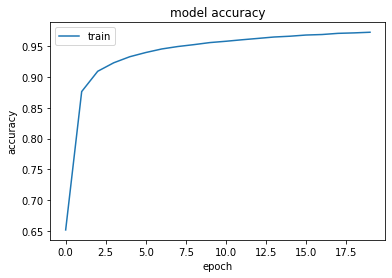

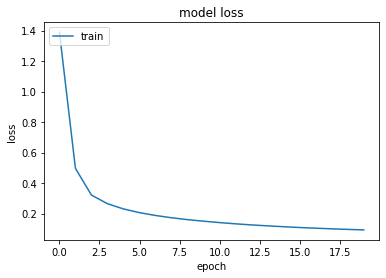

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()